In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Myocardial infarction complications.csv to Myocardial infarction complications (1).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Myocardial infarction complications.csv']))

In [ ]:
df.drop('ID',
  axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [ ]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,...,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,...,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,...,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,...,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,...,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,0.0,...,0.0,130.0,1.05,0.52,NaN,12.8,6.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,50.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,70.0,50.0,0.0,NaN,0.0,...,NaN,NaN,0.23,0.15,NaN,8.3,13.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,110.0,70.0,0.0,0.0,1.0,...,0.0,136.0,0.45,0.45,NaN,7.5,4.0,2.0,1.0,NaN,NaN,1.0,0.0,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
missing_list=df.isnull().sum().tolist()
missing_list

[8,
 0,
 4,
 106,
 73,
 51,
 1628,
 9,
 8,
 248,
 54,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 11,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 1076,
 1076,
 267,
 267,
 12,
 15,
 14,
 12,
 12,
 12,
 83,
 80,
 80,
 72,
 1,
 152,
 152,
 152,
 152,
 152,
 152,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 369,
 371,
 375,
 375,
 284,
 285,
 1696,
 125,
 203,
 126,
 16,
 108,
 128,
 657,
 686,
 677,
 9,
 5,
 108,
 131,
 10,
 110,
 131,
 10,
 11,
 13,
 17,
 17,
 16,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
b=[]
cont=["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]
for i in cont:
    a=df[i].isnull().sum()
    b.append(a)
b

[8, 1076, 1076, 267, 267, 371, 375, 284, 285, 1696, 125, 203]

In [ ]:
missing_list

[8,
 0,
 4,
 106,
 73,
 51,
 1628,
 9,
 8,
 248,
 54,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 11,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 1076,
 1076,
 267,
 267,
 12,
 15,
 14,
 12,
 12,
 12,
 83,
 80,
 80,
 72,
 1,
 152,
 152,
 152,
 152,
 152,
 152,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 115,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 369,
 371,
 375,
 375,
 284,
 285,
 1696,
 125,
 203,
 126,
 16,
 108,
 128,
 657,
 686,
 677,
 9,
 5,
 108,
 131,
 10,
 110,
 131,
 10,
 11,
 13,
 17,
 17,
 16,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df.columns.to_list()

['AGE',
 'SEX',
 'INF_ANAM',
 'STENOK_AN',
 'FK_STENOK',
 'IBS_POST',
 'IBS_NASL',
 'GB',
 'SIM_GIPERT',
 'DLIT_AG',
 'ZSN_A',
 'nr_11',
 'nr_01',
 'nr_02',
 'nr_03',
 'nr_04',
 'nr_07',
 'nr_08',
 'np_01',
 'np_04',
 'np_05',
 'np_07',
 'np_08',
 'np_09',
 'np_10',
 'endocr_01',
 'endocr_02',
 'endocr_03',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'zab_leg_04',
 'zab_leg_06',
 'S_AD_KBRIG',
 'D_AD_KBRIG',
 'S_AD_ORIT',
 'D_AD_ORIT',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'GT_POST',
 'FIB_G_POST',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_06',
 'ritm_ecg_p_07',
 'ritm_ecg_p_08',
 'n_r_ecg_p_01',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_r_ecg_p_09',
 'n_r_ecg_p_10',
 'n_p_ecg_p_01',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_07',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p

# Making list of Categorical and continous varibale for imputataions

In [ ]:
continuous_param_list=["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]

In [ ]:
len(continuous_param_list)

12

In [ ]:
categorical_param_list=[ 'SEX','INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','IBS_NASL','GB','SIM_GIPERT','DLIT_AG','ZSN_A',
'nr_11','nr_01','nr_02','nr_03','nr_04','nr_07','nr_08','np_01','np_04','np_05','np_07',
 'np_08',
 'np_09',
 'np_10',
 'endocr_01',
 'endocr_02',
 'endocr_03',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'zab_leg_04',
 'zab_leg_06',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'GT_POST',
 'FIB_G_POST',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_06',
 'ritm_ecg_p_07',
 'ritm_ecg_p_08',
 'n_r_ecg_p_01',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_r_ecg_p_09',
 'n_r_ecg_p_10',
 'n_p_ecg_p_01',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_07',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p_ecg_p_11',
 'n_p_ecg_p_12',
 'fibr_ter_01',
 'fibr_ter_02',
 'fibr_ter_03',
 'fibr_ter_05',
 'fibr_ter_06',
 'fibr_ter_07',
 'fibr_ter_08',
 'GIPO_K',
 'GIPER_NA',
 'TIME_B_S',
 'R_AB_1_n',
 'R_AB_2_n',
 'R_AB_3_n',
 'NA_KB',
 'NOT_NA_KB',
 'LID_KB',
 'NITR_S',
 'NA_R_1_n',
 'NA_R_2_n',
 'NA_R_3_n',
 'NOT_NA_1_n',
 'NOT_NA_2_n',
 'NOT_NA_3_n',
 'LID_S_n',
 'B_BLOK_S_n',
 'ANT_CA_S_n',
 'GEPAR_S_n',
 'ASP_S_n',
 'TIKL_S_n',
 'TRENT_S_n',
 'FIBR_PREDS',
 'PREDS_TAH',
 'JELUD_TAH',
 'FIBR_JELUD',
 'A_V_BLOK',
 'OTEK_LANC',
 'RAZRIV',
 'DRESSLER',
 'ZSN',
 'REC_IM',
 'P_IM_STEN',
 'LET_IS']


In [ ]:
len(categorical_param_list)

111

# Median imputation for continuous values

In [ ]:
for column in continuous_param_list:
    df[column].fillna(df[column].median(),inplace=True)


# Mode Imputation for categorical values 


In [ ]:
for column in categorical_param_list:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [ ]:
missing_list=df.isnull().sum().tolist()

In [ ]:

missing_list.count(0)

123

In [ ]:
df['S_AD_KBRIG'].isin([140]).sum()

1167

In [ ]:
df['K_BLOOD'].isin([4.1]).sum()

433

In [ ]:
df['IBS_POST'].isin([2]).sum()

734

In [ ]:
df['SIM_GIPERT'].isin([0]).sum()

1643

In [ ]:
df['DLIT_AG'].isin([0]).sum()

799

In [ ]:
df.dtypes

AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
FK_STENOK    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 123, dtype: object

In [ ]:

df_new = df['LET_IS']
df_new

0       0
1       0
2       0
3       0
4       0
       ..
1695    3
1696    1
1697    6
1698    1
1699    1
Name: LET_IS, Length: 1700, dtype: int64

# Function for normalizing continuous data 

In [ ]:
for column in continuous_param_list:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [ ]:

df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,...,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0.772727,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.692308,0.526316,0.0,0.0,0.0,...,0.0,0.403846,0.117845,0.085308,0.166667,0.231660,0.107914,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.439394,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.461538,0.473684,0.0,0.0,0.0,...,0.0,0.288462,0.117845,0.066351,0.166667,0.223938,0.014388,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.393939,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.576923,0.526316,0.692308,0.526316,0.0,0.0,0.0,...,0.0,0.288462,0.090909,0.033175,0.166667,0.339768,0.064748,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.636364,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.461538,0.368421,0.0,0.0,0.0,...,0.0,0.557692,0.242424,0.156398,0.166667,0.231660,0.064748,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.515152,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730769,0.526316,0.615385,0.473684,0.0,0.0,0.0,...,0.0,0.288462,0.141414,0.085308,0.166667,0.243243,0.064748,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.772727,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.423077,0.368421,0.0,0.0,0.0,...,0.0,0.250000,0.343434,0.227488,0.166667,0.416988,0.035971,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,0.666667,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.538462,0.421053,0.192308,0.000000,0.0,1.0,0.0,...,0.0,0.365385,0.117845,0.085308,0.166667,0.231660,0.064748,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1697,0.439394,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.269231,0.263158,0.0,0.0,0.0,...,0.0,0.365385,0.067340,0.052133,0.166667,0.243243,0.086331,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,6
1698,0.803030,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
import pandas as pd
from sklearn import preprocessing


In [ ]:

normalized_col = preprocessing.normalize(df)
print(normalized_col)

[[0.07835224 0.10139701 0.20279403 ... 0.         0.         0.        ]
 [0.07393529 0.16826652 0.16826652 ... 0.         0.         0.        ]
 [0.04493901 0.11407594 0.         ... 0.         0.         0.        ]
 ...
 [0.03928013 0.08939615 0.26818845 ... 0.08939615 0.         0.53637691]
 [0.08340059 0.         0.20771467 ... 0.         0.         0.10385734]
 [0.08081985 0.14416514 0.28833028 ... 0.         0.         0.14416514]]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
 
# separate the independent and dependent variables
X_data = df
target = df_new
 
# standardization of dependent variables
scaled_data = scale.fit_transform(X_data) 
print(scaled_data)

[[ 1.34792144  0.77216846  1.73022388 ... -0.32121605 -0.30880548
  -0.34534162]
 [-0.61105353  0.77216846  0.53405446 ... -0.32121605 -0.30880548
  -0.34534162]
 [-0.87818648  0.77216846 -0.66211495 ... -0.32121605 -0.30880548
  -0.34534162]
 ...
 [-0.61105353  0.77216846  2.9263933  ...  3.11316943 -0.30880548
   3.99804251]
 [ 1.52601007 -1.29505419  1.73022388 ... -0.32121605 -0.30880548
   0.37855573]
 [ 0.101301    0.77216846  1.73022388 ... -0.32121605 -0.30880548
   0.37855573]]


[link text](https:// [link text](https://))# Feature Extraction using chi2

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
X = df.iloc[:,:-12]
y = df.iloc[:,-1]

In [ ]:
X

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,...,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,0.772727,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.692308,0.526316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406780,0.0,0.403846,0.117845,0.085308,0.166667,0.231660,0.107914,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.439394,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.461538,0.473684,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.203390,0.0,0.288462,0.117845,0.066351,0.166667,0.223938,0.014388,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.393939,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.576923,0.526316,0.692308,0.526316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288136,0.0,0.288462,0.090909,0.033175,0.166667,0.339768,0.064748,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.636364,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.461538,0.368421,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.271186,0.0,0.557692,0.242424,0.156398,0.166667,0.231660,0.064748,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.515152,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730769,0.526316,0.615385,0.473684,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.203390,0.0,0.288462,0.141414,0.085308,0.166667,0.243243,0.064748,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.772727,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.423077,0.368421,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.237288,0.0,0.250000,0.343434,0.227488,0.166667,0.416988,0.035971,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,0.666667,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.538462,0.421053,0.192308,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305085,0.0,0.365385,0.117845,0.085308,0.166667,0.231660,0.064748,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,0.439394,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.421053,0.269231,0.263158,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305085,0.0,0.365385,

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1695    3
1696    1
1697    6
1698    1
1699    1
Name: LET_IS, Length: 1700, dtype: int64

In [ ]:
column_list = X.columns.tolist()

In [ ]:

len(column_list)

111

In [ ]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([4.62026571e+00, 1.51030943e+01, 5.02338566e+01, 7.74634517e+01,
       4.33239412e+01, 3.07487375e+01, 5.12036389e+00, 1.90291182e+01,
       9.37589009e+00, 7.23900437e+01, 2.50976114e+02, 6.36360820e+00,
       2.22878081e+01, 4.18587642e+00, 1.26414813e+01, 5.32513073e+01,
       1.89643107e-01, 2.54033335e+00, 1.43355623e+01, 3.73770596e+00,
       5.53884306e+00, 1.89643107e-01, 1.54888799e+01, 3.79286214e-01,
       2.71857440e+01, 2.63512347e+01, 2.09257152e+01, 1.36639637e+00,
       7.81213774e+00, 3.42825939e+01, 2.32529066e+01, 4.34563267e+00,
       2.54941617e+00, 1.38312180e+00, 1.21381147e+00, 5.34763010e+00,
       5.01767110e+00, 6.68483562e+01, 5.21733122e+02, 5.29168988e+01,
       2.88348755e+01, 1.21838221e+00, 1.87698259e+01, 6.86391688e+01,
       2.84660378e+01, 9.75271324e+00, 6.69603632e+00, 4.79146935e+01,
       2.83532451e+01, 6.36891156e+01, 3.24294622e+01, 1.89643107e-01,
       4.23017727e+01, 3.24303941e+00, 4.92193658e+00, 7.15693440e+00,
      

In [ ]:
len(fit.scores_)

111

# Making dict of score and feature  using df.columns as list and chi2 score as values as to get idea of weights of each columns

In [ ]:
d=dict();
for i in range(len(fit.scores_)):
    d[column_list[i]]= fit.scores_[i]

In [ ]:
d

{'AGE': 4.620265712697622,
 'ALT_BLOOD': 1.4793908736773749,
 'ANT_CA_S_n': 22.808019280447276,
 'ASP_S_n': 23.93723250932277,
 'AST_BLOOD': 1.5657944943166395,
 'B_BLOK_S_n': 13.551458774832616,
 'DLIT_AG': 72.3900437314849,
 'D_AD_KBRIG': 1.2138114652988918,
 'D_AD_ORIT': 5.01767109990906,
 'FIB_G_POST': 18.7698258570055,
 'FK_STENOK': 43.32394124440978,
 'GB': 19.029118180963344,
 'GEPAR_S_n': 7.335569169310554,
 'GIPER_NA': 3.621009881098521,
 'GIPO_K': 6.060271935509318,
 'GT_POST': 1.2183822126089443,
 'IBS_NASL': 5.12036389083275,
 'IBS_POST': 30.74873753634574,
 'IM_PG_P': 47.914693470746656,
 'INF_ANAM': 50.23385658922355,
 'KFK_BLOOD': 0.000296781075223443,
 'K_BLOOD': 0.4248056863742206,
 'K_SH_POST': 521.7331222387054,
 'LID_KB': 8.956205904162129,
 'LID_S_n': 5.022234326612516,
 'L_BLOOD': 2.920920648197848,
 'MP_TP_POST': 52.916898825161205,
 'NA_BLOOD': 0.23406429907739823,
 'NA_KB': 2.4030646864106964,
 'NA_R_1_n': 63.667543590886034,
 'NA_R_2_n': 11.737464037712517,
 '

# Filtering the dict based on values of score you wish to have among the chi2 predicted scores eg- 10,15,20

In [ ]:
high_score_features={k:v for (k,v) in d.items() if v > 5}

In [ ]:
high_score_features

{'ANT_CA_S_n': 22.808019280447276,
 'ASP_S_n': 23.93723250932277,
 'B_BLOK_S_n': 13.551458774832616,
 'DLIT_AG': 72.3900437314849,
 'D_AD_ORIT': 5.01767109990906,
 'FIB_G_POST': 18.7698258570055,
 'FK_STENOK': 43.32394124440978,
 'GB': 19.029118180963344,
 'GEPAR_S_n': 7.335569169310554,
 'GIPO_K': 6.060271935509318,
 'IBS_NASL': 5.12036389083275,
 'IBS_POST': 30.74873753634574,
 'IM_PG_P': 47.914693470746656,
 'INF_ANAM': 50.23385658922355,
 'K_SH_POST': 521.7331222387054,
 'LID_KB': 8.956205904162129,
 'LID_S_n': 5.022234326612516,
 'MP_TP_POST': 52.916898825161205,
 'NA_R_1_n': 63.667543590886034,
 'NA_R_2_n': 11.737464037712517,
 'NA_R_3_n': 57.37316590056685,
 'NITR_S': 94.03762074572715,
 'NOT_NA_1_n': 17.343056706451517,
 'NOT_NA_2_n': 22.976308516869306,
 'NOT_NA_3_n': 44.793308425889826,
 'O_L_POST': 66.84835617972199,
 'R_AB_1_n': 32.04759974707354,
 'R_AB_2_n': 7.131691262274373,
 'R_AB_3_n': 87.4762493973921,
 'SEX': 15.103094326907588,
 'SIM_GIPERT': 9.375890089917757,
 'S

In [ ]:
len(high_score_features)

74

In [ ]:
selected_features = []
for k,v in high_score_features.items():
    selected_features.append(k)
selected_features

['SEX',
 'INF_ANAM',
 'STENOK_AN',
 'FK_STENOK',
 'IBS_POST',
 'IBS_NASL',
 'GB',
 'SIM_GIPERT',
 'DLIT_AG',
 'ZSN_A',
 'nr_11',
 'nr_01',
 'nr_03',
 'nr_04',
 'np_01',
 'np_05',
 'np_08',
 'np_10',
 'endocr_01',
 'endocr_02',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'S_AD_ORIT',
 'D_AD_ORIT',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'FIB_G_POST',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_07',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p_ecg_p_12',
 'fibr_ter_02',
 'fibr_ter_03',
 'fibr_ter_08',
 'GIPO_K',
 'TIME_B_S',
 'R_AB_1_n',
 'R_AB_2_n',
 'R_AB_3_n',
 'LID_KB',
 'NITR_S',
 'NA_R_1_n',
 'NA_R_2_n',
 'NA_R_3_n',
 'NOT_NA_1_n',
 'NOT_NA_2_n',
 'NOT_NA_3_n',
 'LID_S_n',
 'B_BLOK_S_n',
 'ANT_CA_S_n',
 'GE

# Making Data set Compatible with Feature Engg selected features only and dropping rest features automatically and no updation from user needed

In [ ]:
for i in df.columns:
    if i not in selected_features:
        df.drop(i,axis=1, inplace=True)
    else:
        pass

In [ ]:
df['LET_IS'] = df_new

In [ ]:
df

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_03,nr_04,np_01,np_05,np_08,np_10,endocr_01,endocr_02,zab_leg_01,zab_leg_02,zab_leg_03,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_07,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_12,fibr_ter_02,fibr_ter_03,fibr_ter_08,GIPO_K,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,LET_IS
0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.526316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0.473684,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
2,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.526316,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0
3,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.461538,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,0.473684,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1696,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.192308,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1697,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269231,0.263158,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6
1698,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.368421,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1


In [ ]:
a=df.isnull().sum()
a.sum()

0

In [ ]:
import matplotlib.pyplot as plt

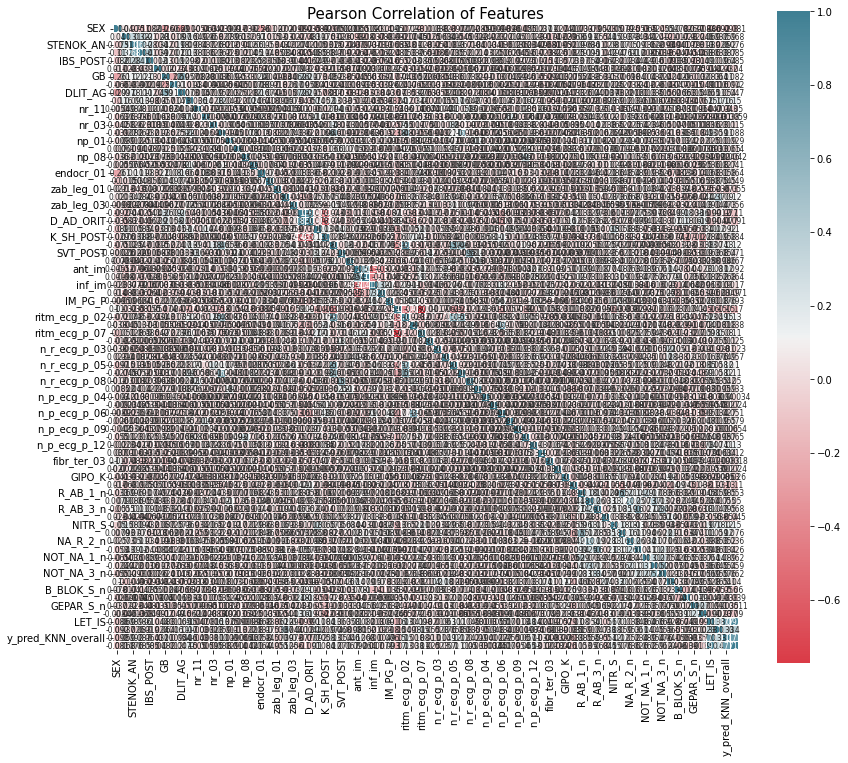

In [ ]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':7.5})
plt.show()

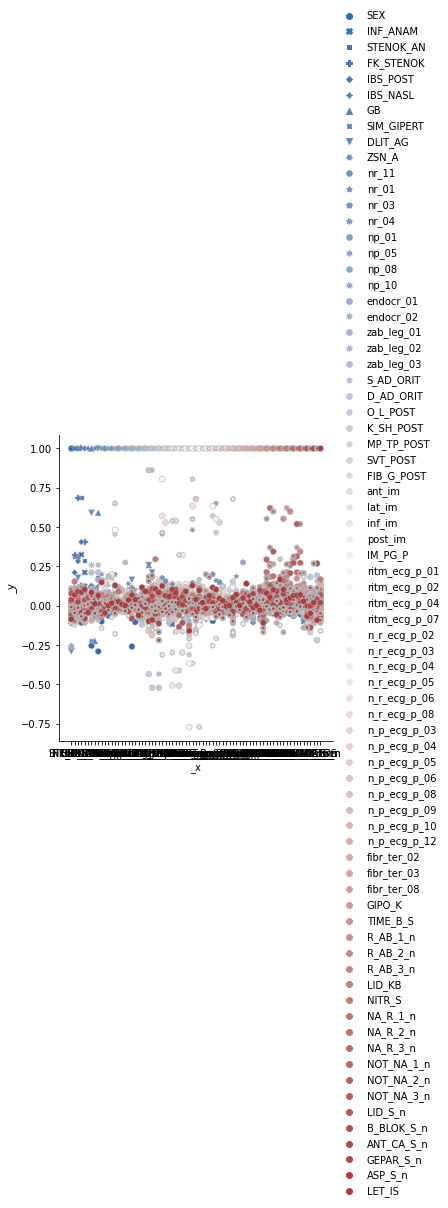

In [ ]:
corr_mat = df.corr()
g = sns.relplot(
    data=corr_mat,
    palette="vlag", edgecolor=".7",
)

# Checking balance for y which shows large imbalance and we need dataset balancing for it 

In [ ]:
df.LET_IS.value_counts()

0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

# Balancing imbalanced dataset for train set only

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels=['LET_IS'], axis=1),df['LET_IS'],test_size=0.2,random_state=41)


# ## Train dataset balancing

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#y_train_res
#X_train_res

[(0, 1140), (1, 1140), (2, 1140), (3, 1140), (4, 1140), (5, 1140), (6, 1140), (7, 1140)]


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

# Decision Tree  method

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=9)
dtree.fit(x_train_res, y_train_res)
# Test Accuracy,confusion matrix, classification report
y_pred_DT_test=dtree.predict(x_test)
print ('Accuracy test:', accuracy_score(y_test, y_pred_DT_test))
print ('Confusion matrix:', confusion_matrix(y_test, y_pred_DT_test))
print ('classification report test:', classification_report(y_test, y_pred_DT_test))
# Train Accuracy
y_pred_DT_train=dtree.predict(x_train_res)
print ('Accuracy train:', accuracy_score(y_train_res, y_pred_DT_train))

Accuracy test: 0.7264705882352941
Confusion matrix: [[235   5   7   6  11   3  20   2]
 [  7  12   2   1   0   0   0   0]
 [  2   0   0   2   0   0   0   0]
 [  9   1   1   0   1   0   1   0]
 [  4   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   1   0]]
classification report test:               precision    recall  f1-score   support

           0       0.90      0.81      0.85       289
           1       0.63      0.55      0.59        22
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.73       340
   macro avg       0.19      0.17      0.18       340
weighted avg       0.80      0.73      0.76

In [ ]:
#DT_accuracy = accuracy_score(y_test, y_pred_DT_test)
#DT_accuracy

# Finding optimum value of max_depth for improving accuracy for DT using Gridsearch CV on train balanced dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
max_depth = np.array(range(1,10))
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier(criterion = 'entropy')
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)
print(grid.best_score_)
print(grid.best_params_)

0.9015350877192982
{'max_depth': 9}


# KNN Method 

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN.fit(x_train_res, y_train_res)
# Test Accuracy,confusion matrix, classification report
y_pred_KNN_test=model_KNN.predict(x_test)
print ('Accuracy test:', accuracy_score(y_test, y_pred_KNN_test))
print ('Confusion matrix test:', confusion_matrix(y_test, y_pred_KNN_test))
print ('classification report test:', classification_report(y_test, y_pred_KNN_test))
# Train Accuracy
y_pred_KNN_train=model_KNN.predict(x_train_res)
print ('Accuracy train:', accuracy_score(y_train_res, y_pred_KNN_train))


Accuracy test: 0.6823529411764706
Confusion matrix test: [[223  11   1  14   7   5  24   4]
 [  7   6   2   4   0   1   2   0]
 [  2   0   1   0   0   0   1   0]
 [  6   2   0   2   1   0   2   0]
 [  1   0   0   0   0   0   3   0]
 [  1   0   0   0   1   0   0   0]
 [  1   1   0   1   0   0   0   0]
 [  1   0   0   2   0   0   0   0]]
classification report test:               precision    recall  f1-score   support

           0       0.92      0.77      0.84       289
           1       0.30      0.27      0.29        22
           2       0.25      0.25      0.25         4
           3       0.09      0.15      0.11        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.68       340
   macro avg       0.19      0.18      0.19       340
weighted avg       0.81      0.68     

In [ ]:
#KNN_accuracy = accuracy_score(y_test, y_pred_KNN_test)
#KNN_accuracy

# Finding optimum value of n_neighbours for improving accuracy for KNN using Gridsearch CV on train balanced dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy

In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model_1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_1, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9673245614035088
{'n_neighbors': 2}


# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 130
max_features = 4
model_RF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_RF.fit(x_train_res, y_train_res)
# Test Accuracy,confusion matrix, classification report
y_pred_RF_test=model_RF.predict(x_test)
print ('Accuracy test:', accuracy_score(y_test, y_pred_RF_test))
print ('Confusion matrix test:', confusion_matrix(y_test, y_pred_RF_test))
print ('classification report test:', classification_report(y_test, y_pred_RF_test))
# Train Accuracy
y_pred_RF_train=model_RF.predict(x_train_res)
print ('Accuracy train:', accuracy_score(y_train_res, y_pred_RF_train))


Accuracy test: 0.8735294117647059
Confusion matrix test: [[288   0   0   0   0   0   1   0]
 [ 13   9   0   0   0   0   0   0]
 [  3   1   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]]
classification report test:               precision    recall  f1-score   support

           0       0.88      1.00      0.93       289
           1       0.82      0.41      0.55        22
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.87       340
   macro avg       0.21      0.18      0.18       340
weighted avg       0.80      0.87     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#RF_accuracy = accuracy_score(y_test, y_pred_RF_test)
#RF_accuracy

# Finding optimum value of n_estimators and max_features for improving accuracy for RF using Gridsearch CV on train balanced dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(100,150))
param_grid = dict(n_estimators=n_neighbors)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)
print(grid.best_score_)
print(grid.best_params_)

0.9923245614035088
{'n_estimators': 116}


In [ ]:
from sklearn.model_selection import GridSearchCV
max_features = np.array(range(1,5))
param_grid = dict(max_features=max_features)
model = RandomForestClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)
print(grid.best_score_)
print(grid.best_params_)

0.9918859649122806
{'max_features': 3}


In [ ]:
df

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_03,nr_04,np_01,np_05,np_08,np_10,endocr_01,endocr_02,zab_leg_01,zab_leg_02,zab_leg_03,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_07,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_12,fibr_ter_02,fibr_ter_03,fibr_ter_08,GIPO_K,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,LET_IS
0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.526316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0.473684,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0
2,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.526316,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0
3,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.461538,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0
4,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,0.473684,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1696,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.192308,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1697,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269231,0.263158,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6
1698,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.368421,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1


# Testing individual models for Overall dataset

In [ ]:
array = df.values
X_overall = array[:, 0:-1]
Y_overall = array[:, -1]

In [ ]:
X_overall

array([[1., 2., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 3., 6., ..., 0., 1., 1.],
       [0., 2., 2., ..., 1., 1., 1.],
       [1., 2., 0., ..., 0., 0., 0.]])

In [ ]:
Y_overall

array([0., 0., 0., ..., 6., 1., 1.])

In [ ]:
# DT for Overall

In [ ]:
y_pred_DT_overall=dtree.predict(X_overall)
print ('Accuracy overall:', accuracy_score(Y_overall, y_pred_DT_overall))
print ('classification report overall:', classification_report(Y_overall, y_pred_DT_overall))

Accuracy overall: 0.8029411764705883
classification report overall:               precision    recall  f1-score   support

         0.0       0.92      0.85      0.89      1429
         1.0       0.72      0.54      0.61       110
         2.0       0.31      0.56      0.40        18
         3.0       0.42      0.46      0.44        54
         4.0       0.29      0.57      0.38        23
         5.0       0.33      0.58      0.42        12
         6.0       0.15      0.63      0.24        27
         7.0       0.63      0.63      0.63        27

    accuracy                           0.80      1700
   macro avg       0.47      0.60      0.50      1700
weighted avg       0.86      0.80      0.82      1700



In [ ]:
DT_accuracy = accuracy_score(Y_overall, y_pred_DT_overall)
DT_accuracy

0.8029411764705883

In [ ]:
# KNN for Overall

In [ ]:
y_pred_KNN_overall=model_KNN.predict(X_overall)
print ('Accuracy overall:', accuracy_score(Y_overall, y_pred_KNN_overall))
print ('classification report overall:', classification_report(Y_overall, y_pred_KNN_overall))

Accuracy overall: 0.9364705882352942
classification report overall:               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1429
         1.0       0.87      0.85      0.86       110
         2.0       0.83      0.83      0.83        18
         3.0       0.67      0.80      0.73        54
         4.0       0.68      0.83      0.75        23
         5.0       0.62      0.83      0.71        12
         6.0       0.43      0.89      0.58        27
         7.0       0.86      0.89      0.87        27

    accuracy                           0.94      1700
   macro avg       0.74      0.86      0.79      1700
weighted avg       0.95      0.94      0.94      1700



In [ ]:
KNN_accuracy = accuracy_score(Y_overall, y_pred_KNN_overall)
KNN_accuracy

0.9364705882352942

In [ ]:
# RF for overall

In [ ]:
y_pred_RF_overall=model_RF.predict(X_overall)
print ('Accuracy overall:', accuracy_score(Y_overall, y_pred_RF_overall))
print ('classification report overall:', classification_report(Y_overall, y_pred_RF_overall))

Accuracy overall: 0.9747058823529412
classification report overall:               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1429
         1.0       0.98      0.88      0.93       110
         2.0       1.00      0.78      0.88        18
         3.0       1.00      0.76      0.86        54
         4.0       1.00      0.83      0.90        23
         5.0       1.00      0.83      0.91        12
         6.0       0.96      0.89      0.92        27
         7.0       1.00      0.89      0.94        27

    accuracy                           0.97      1700
   macro avg       0.99      0.86      0.92      1700
weighted avg       0.98      0.97      0.97      1700



In [ ]:
RF_accuracy = accuracy_score(Y_overall, y_pred_RF_overall)
RF_accuracy

0.9747058823529412

In [ ]:

df["y_pred_DT_overall"] = y_pred_DT_overall
df["y_pred_KNN_overall"] = y_pred_KNN_overall
df["y_pred_RF_overall"] = y_pred_RF_overall

In [ ]:
df.to_csv("Final_dataframe_with_predictions.csv")

# Finding From above methods RF gives high Accuracy For test,train, and also for overall dataset. So Random forest is best method for prediction and obtaining classification and is selected for final deployment.

In [ ]:
df

,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_03,nr_04,np_01,np_05,np_08,np_10,endocr_01,endocr_02,zab_leg_01,zab_leg_02,zab_leg_03,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_07,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_12,fibr_ter_02,fibr_ter_03,fibr_ter_08,GIPO_K,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,LET_IS,y_pred_DT_overall,y_pred_KNN_overall,y_pred_RF_overall
0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.526316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0,0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0.473684,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0,0,0,0
2,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.526316,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0,0,0,0
3,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.461538,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0
4,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,0.473684,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0,0
1696,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.192308,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1,1
1697,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269231,0.263158,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6,0,6,6
1698,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.368421,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1,1,1,1


# ***Plots and Graphs***

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['SEX'].value_counts()

1    1065
0     635
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

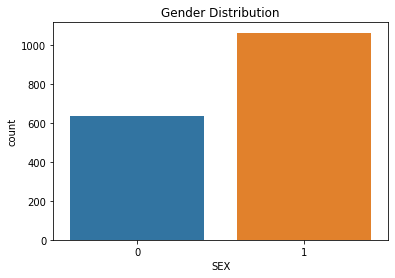

In [ ]:
count_plot = sns.countplot(x="SEX", data=df)
plt.title('Gender Distribution')
#swarm_plot = sns.swarmplot(...)
#fig = count_plot.get_figure()
#plt.savefig('filename.png')

Text(0.5, 0.98, 'Gender vs Presence of a right ventriculor myocardial infraction')

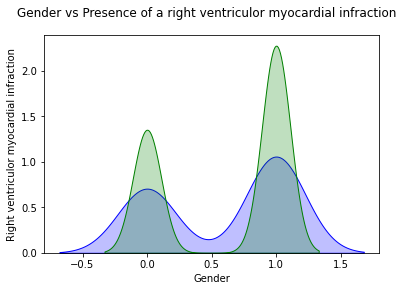

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["IM_PG_P"]==1]["SEX"], shade=True, color="blue", ax=ax)
sns.kdeplot(df[df["IM_PG_P"]==0]["SEX"], shade=True, color="green", ax=ax)

ax.set_xlabel("Gender")
ax.set_ylabel("Right ventriculor myocardial infraction")

fig.suptitle("Gender vs Presence of a right ventriculor myocardial infraction")

In [ ]:
import plotly.express as px
#data = px.data.gapminder()
#Symptomatic hypertension 
fig = px.bar(df, x='LET_IS', y='SIM_GIPERT',
              color='LET_IS', height=400)
fig.show()

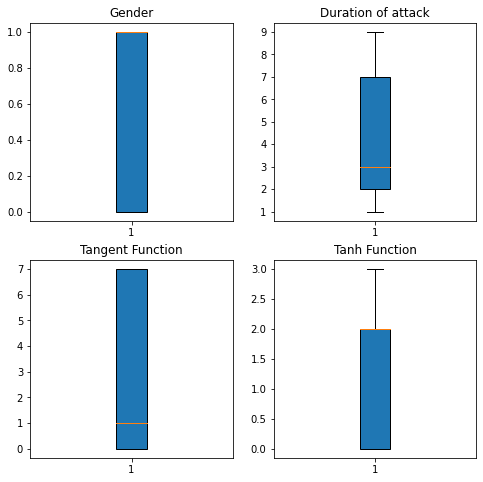

In [ ]:
# importing libraries
#import matplotlib.pyplot as plt
#import numpy as np
#import math

# Get the angles from 0 to 2 pie (360 degree) in narray object
#X = np.arange(0, math.pi*2, 0.05)

# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
#Y1 = np.sin(X)
#Y2 = np.cos(X)
#Y3 = np.tan(X)
#Y4 = np.tanh(X)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.set_figheight(8)
figure.set_figwidth(8)

# For Sine Function
axis[0, 0].boxplot(df['SEX'], patch_artist=True)
axis[0, 0].set_title("Gender")

# For Cosine Function
axis[0, 1].boxplot(df['TIME_B_S'], patch_artist=True)
axis[0, 1].set_title("Duration of attack")

# For Tangent Function
axis[1, 0].boxplot(df['DLIT_AG'], patch_artist=True)
axis[1, 0].set_title("Tangent Function")

# For Tanh Function
axis[1, 1].boxplot(df['GB'], patch_artist=True)
axis[1, 1].set_title("Tanh Function")


# Combine all the operations and display
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



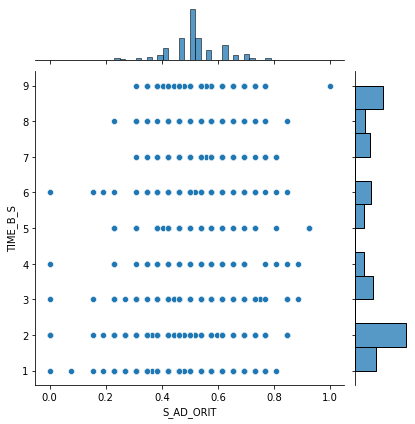

In [ ]:
sns.jointplot(df['S_AD_ORIT'], df['TIME_B_S'])

In [ ]:
df['TIME_B_S'].value_counts()

2.0    486
9.0    269
1.0    198
3.0    175
6.0    151
7.0    141
8.0    101
5.0     92
4.0     87
Name: TIME_B_S, dtype: int64

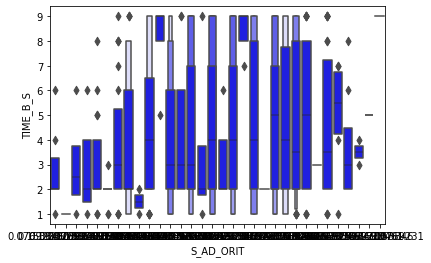

In [ ]:
sns.boxenplot(x="S_AD_ORIT", y="TIME_B_S",
              color="b",
              scale="linear", data=df)

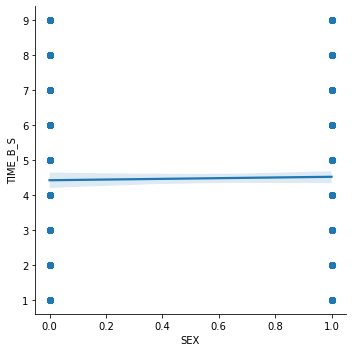

In [ ]:
g = sns.lmplot(
    data=df,
    x="SEX", y="TIME_B_S",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("SEX","TIME_B_S")

SVM Model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
model = SVC(kernel = 'linear', C = 1)

In [ ]:
model.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVM_accuracy = model.score(X_test, y_test)
SVM_accuracy

0.8441176470588235

Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  
  
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 
cm 

array([[ 8, 15, 89, 23, 18, 96, 32,  8],
       [ 1,  3,  5,  1,  1,  3,  5,  0],
       [ 0,  0,  3,  1,  1,  0,  1,  0],
       [ 1,  0,  3,  1,  1,  3,  0,  0],
       [ 0,  0,  2,  0,  1,  2,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  0],
       [ 1,  0,  1,  1,  2,  0,  2,  0]])

In [ ]:
NB_accuracy = classifier.score(x_test, y_pred)
NB_accuracy

1.0

Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.25, 
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.8494117647058823


In [ ]:
LR_accuracy = score
LR_accuracy

0.8494117647058823

In [ ]:
y_pred = classifier.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[358   1   0   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       359
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         7

    accuracy                           0.84       425
   macro avg       0.11      0.12      0.11       425
weighted avg       0.71      0.84      0.77       425



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy Dictionary 

In [ ]:
final_accuracy = {'Logistic Regression': LR_accuracy,
                  'Naive Bayes': NB_accuracy}

In [ ]:
final_accuracy

{'Logistic Regression': 0.8494117647058823, 'Naive Bayes': 1.0}

In [ ]:
# import module
from tabulate import tabulate
  
# assign data
mydata = [{LR_accuracy,"Logistic Regression"}, 
          {SVM_accuracy, "SVM"}, 
          {NB_accuracy,"Naive Bayes"}, 
          {RF_accuracy, "Random Forests"},
          {KNN_accuracy, "KNN",},
          {DT_accuracy, "Decision Tree"}]
  
# create header
head = ["Accuracy", "Model"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+------------+---------------------+
|   Accuracy | Model               |
+============+=====================+
|   0.849412 | Logistic Regression |
+------------+---------------------+
|   0.844118 | SVM                 |
+------------+---------------------+
|   1        | Naive Bayes         |
+------------+---------------------+
|   0.974706 | Random Forests      |
+------------+---------------------+
|   0.936471 | KNN                 |
+------------+---------------------+
|   0.802941 | Decision Tree       |
+------------+---------------------+
